# **کار با دیتا**

In [1]:
!gdown -q 1hsyA7pTTNGtVrUMxZ_Y74-slLj0hF0UX

In [2]:
import pandas as pd

df = pd.read_csv("/content/fraud_detection_dataset.csv")
df.head()

,duration_hour,type,amount,name_original,balance_original_before,balance_original_after,name_destination,balance_destination_before,balance_destination_after,is_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
class_distribution = df['is_fraud'].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
0    6354407
1       8213
Name: is_fraud, dtype: int64


In [4]:
import pandas as pd
df = df[['duration_hour', 'type', 'amount', 'balance_original_before', 'balance_original_after',
                   'balance_destination_before', 'balance_destination_after', 'is_fraud']]
df


,duration_hour,type,amount,balance_original_before,balance_original_after,balance_destination_before,balance_destination_after,is_fraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


<ipython-input-5-37f71a10b548>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()['is_fraud'].sort_values(ascending=False)


Correlation with 'is_fraud':
is_fraud                      1.000000
amount                        0.076688
duration_hour                 0.031578
balance_original_before       0.010154
balance_destination_after     0.000535
balance_destination_before   -0.005885
balance_original_after       -0.008148
Name: is_fraud, dtype: float64


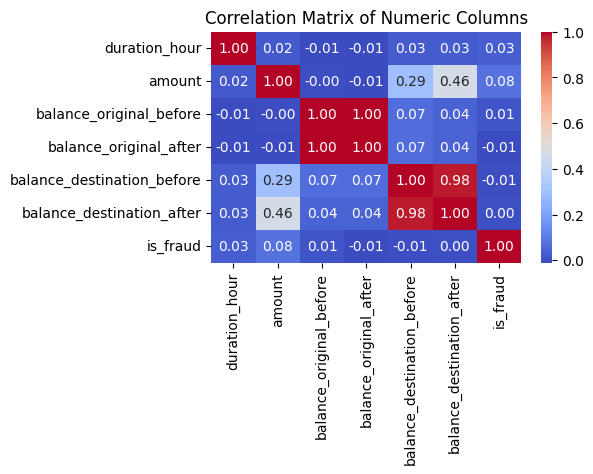

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_with_target = df.corr()['is_fraud'].sort_values(ascending=False)
print("Correlation with 'is_fraud':")
print(correlation_with_target)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [6]:
columns_to_drop = ['balance_original_after', 'balance_destination_before', 'balance_destination_after']
df = df.drop(columns=columns_to_drop, axis=1)

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# #جدا کردن ولیدیشن و سمپل
# X_trainV, X_valid, y_trainV, y_valid = train_test_split(X_train, y_train, test_size=0.01, random_state=42,stratify=y_train)

# X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.05, random_state=42, stratify=y_train)

# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

print("Resampled Training Class Distribution:")
print(pd.Series(y_train).value_counts())
print()
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Resampled Training Class Distribution:
0    4765805
1       6160
Name: is_fraud, dtype: int64

Training set shape: (4771965, 4) (4771965,)
Testing set shape: (1590655, 4) (1590655,)


PREPROCESSING

In [8]:
X_train

,duration_hour,type,amount,balance_original_before
2947509,230,PAYMENT,25106.21,50850.00
983137,44,CASH_IN,226426.20,3815346.61
2596796,208,PAYMENT,662.24,144407.43
3122557,236,CASH_OUT,128838.38,16173.00
5998010,426,TRANSFER,198986.72,0.00
...,...,...,...,...
1524870,153,PAYMENT,1895.99,0.00
5834821,402,CASH_OUT,347110.99,103785.00
4182953,304,PAYMENT,13259.63,0.00
3985280,298,PAYMENT,24122.92,0.00


In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_train_encoded = encoder.fit_transform(X_train[['type']])
X_train = X_train.drop('type', axis=1)
X_train = pd.concat([X_train, pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['type']))], axis=1)
X_train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,duration_hour,amount,balance_original_before,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2947509,230.0,25106.21,50850.00,0.0,0.0,0.0,0.0,1.0
983137,44.0,226426.20,3815346.61,0.0,1.0,0.0,0.0,0.0
2596796,208.0,662.24,144407.43,0.0,1.0,0.0,0.0,0.0
3122557,236.0,128838.38,16173.00,0.0,1.0,0.0,0.0,0.0
5998010,426.0,198986.72,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4771938,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0
4771942,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
4771947,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4771949,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [10]:
from sklearn.preprocessing import MinMaxScaler
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[6.85628743e-01, 2.71578449e-04, 1.16045934e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.28742515e-01, 2.44929347e-03, 8.70708873e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.19760479e-01, 7.16357076e-06, 3.29555460e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.07185629e-01, 1.43431834e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.89221557e-01, 2.60942022e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.58083832e-01, 7.42667708e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [11]:
X_test_encoded = encoder.transform(X_test[['type']])
X_test = X_test.drop('type', axis=1)
X_test = pd.concat([X_test, pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['type']))], axis=1)
X_test.dropna(inplace=True)
X_test_scaled = scaler.transform(X_test)

In [12]:
y_test = y_test[X_test.index]

In [13]:
#جدا کردن ولیدیشن و سمپل
X_trainV, X_valid, y_trainV, y_valid = train_test_split(X_train, y_train, test_size=0.01, random_state=42,stratify=y_train)

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.05, random_state=42, stratify=y_train)

ros = RandomOverSampler(random_state=42)
X_train_scaled, y_train = ros.fit_resample(X_train_scaled, y_train)

X_valid, y_valid = ros.fit_resample(X_valid, y_valid)

X_train_sample, y_train_sample = ros.fit_resample(X_train_sample, y_train_sample)

print("Training set scaled:", X_train_scaled.shape, y_train.shape)
print("valid:", X_valid.shape, y_valid.shape)
print("sample:", X_train_sample.shape, y_train_sample.shape)

Training set scaled: (7152376, 8) (7152376,)
valid: (71524, 8) (71524,)
sample: (357618, 8) (357618,)


# **logistic regression**

**پیاده سازی**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8542338192625073


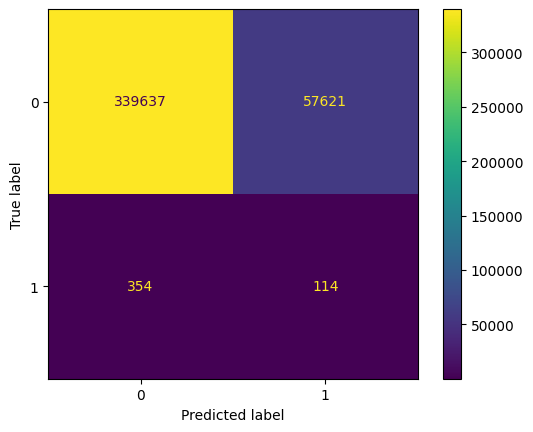

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

# Print the results
print("Precision for label 0:", precision_0)
print("Recall for label 0:", recall_0)
print("F1-score for label 0:", f1_0)

print("Precision for label 1:", precision_1)
print("Recall for label 1:", recall_1)
print("F1-score for label 1:", f1_1)


Precision for label 0: 0.9989587959681285
Recall for label 0: 0.8549532042148931
F1-score for label 0: 0.9213630672947675
Precision for label 1: 0.0019745388412574696
Recall for label 1: 0.24358974358974358
F1-score for label 1: 0.003917323849286119


**آستانه**

In [ ]:
from sklearn.metrics import f1_score
import numpy as np
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

threshold_values = np.linspace(0.1, 0.9, 20)
best_threshold = 0
best_f1_score = 0

for threshold in threshold_values:
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold, pos_label=1)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f"Optimal Threshold: {best_threshold}")
print(f"Best F1-score: {best_f1_score}")


Optimal Threshold: 0.731578947368421
Best F1-score: 0.004664464003109642


**هایپر پارامتر**

In [22]:
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.01,0.1, 1],
    'penalty': ['l1', 'l2']
}

logreg_model = LogisticRegression()

grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_valid, y_valid)

y_pred = grid_search.predict(X_test)

accuracy_class_0 = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
accuracy_class_1 = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])

print("Accuracy for class 0:", accuracy_class_0)
print("Accuracy for class 1:", accuracy_class_1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Accuracy for class 0: 0.5804439432308475
Accuracy for class 1: 0.7564102564102564

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.73    397258
           1       0.00      0.76      0.00       468

    accuracy                           0.58    397726
   macro avg       0.50      0.67      0.37    397726
weighted avg       1.00      0.58      0.73    397726


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}


**پیش بینی اشتباه**



In [20]:
misclassified_zero_indices = np.where((y_test == 1) & (y_pred == 0))[0]

for idx in misclassified_zero_indices:
    example_info = X_test.iloc[idx]
    predicted_label = y_pred[idx]
    true_label = y_test.iloc[idx]

    print(f"\nIndex: {idx}")
    print("Features:")
    print(example_info)
    print(f"Predicted Label: {predicted_label}, True Label: {true_label}")



Index: 1227
Features:
duration_hour                  58.00
amount                     246938.77
balance_original_before    246938.77
type_CASH_IN                    0.00
type_CASH_OUT                   1.00
type_DEBIT                      0.00
type_PAYMENT                    0.00
type_TRANSFER                   0.00
Name: 1030336, dtype: float64
Predicted Label: 0, True Label: 1

Index: 2998
Features:
duration_hour                  6.0
amount                     13704.0
balance_original_before    13704.0
type_CASH_IN                   0.0
type_CASH_OUT                  1.0
type_DEBIT                     0.0
type_PAYMENT                   0.0
type_TRANSFER                  0.0
Name: 7155, dtype: float64
Predicted Label: 0, True Label: 1

Index: 9473
Features:
duration_hour                100.0
amount                     54994.1
balance_original_before    54994.1
type_CASH_IN                   0.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT        

# **SVM**

**پیاده سازی**

Precision for label 0: 0.9989589412285667
Recall for label 0: 0.8574880807938418
F1-score for label 0: 0.9228331055445461
Precision for label 1: 0.001991996756394662
Recall for label 1: 0.24145299145299146
F1-score for label 1: 0.003951394352653204


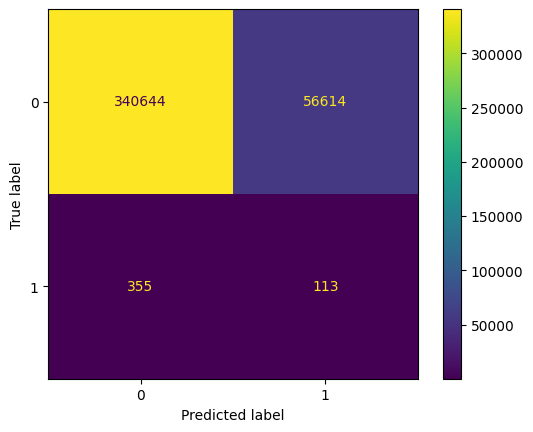

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

linear_svc_model = LinearSVC(random_state=42)
linear_svc_model.fit(X_train_scaled, y_train)

y_pred_test = linear_svc_model.predict(X_test_scaled)

precision_0 = precision_score(y_test, y_pred_test, pos_label=0)
recall_0 = recall_score(y_test, y_pred_test, pos_label=0)
f1_0 = f1_score(y_test, y_pred_test, pos_label=0)

precision_1 = precision_score(y_test, y_pred_test, pos_label=1)
recall_1 = recall_score(y_test, y_pred_test, pos_label=1)
f1_1 = f1_score(y_test, y_pred_test, pos_label=1)

print("Precision for label 0:", precision_0)
print("Recall for label 0:", recall_0)
print("F1-score for label 0:", f1_0)

print("Precision for label 1:", precision_1)
print("Recall for label 1:", recall_1)
print("F1-score for label 1:", f1_1)

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


**آستانه**

In [ ]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

optimal_threshold = thresholds[np.argmax(2 * precision * recall / (precision + recall))]

print("Optimal Threshold (Custom):", optimal_threshold)

print("\nMetrics with Optimal Threshold (Custom):")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-score:  {(2 * precision * recall / (precision + recall)):.2f}")


Optimal Threshold (Custom): 0.99

Metrics with Optimal Threshold (Custom):
Precision: 0.03
Recall:    0.20
F1-score:  0.06


**هایپر پارامتر**

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svc_model = LinearSVC()

param_grid = {
    'C': [0.1, 1]
}

grid_search = GridSearchCV(svc_model, param_grid)

grid_search.fit(X_valid, y_valid)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

y_pred_test = grid_search.predict(X_test)

print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_test))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Hyperparameters: {'C': 0.1}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.74      0.85    397258
           1       0.00      0.16      0.00       468

    accuracy                           0.74    397726
   macro avg       0.50      0.45      0.42    397726
weighted avg       1.00      0.74      0.85    397726



**پیش بینی اشتباه**

In [23]:
misclassified_zero_indices = np.where((y_test == 1) & (y_pred == 0))[0]

for idx in misclassified_zero_indices:
    example_info = X_test.iloc[idx]
    predicted_label = y_pred[idx]
    true_label = y_test.iloc[idx]

    print(f"\nIndex: {idx}")
    print("Features:")
    print(example_info)
    print(f"Predicted Label: {predicted_label}, True Label: {true_label}")


Index: 9473
Features:
duration_hour                100.0
amount                     54994.1
balance_original_before    54994.1
type_CASH_IN                   0.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT                   1.0
type_TRANSFER                  0.0
Name: 1059510, dtype: float64
Predicted Label: 0, True Label: 1

Index: 15854
Features:
duration_hour                 135.00
amount                     128417.96
balance_original_before    128417.96
type_CASH_IN                    1.00
type_CASH_OUT                   0.00
type_DEBIT                      0.00
type_PAYMENT                    0.00
type_TRANSFER                   0.00
Name: 1291694, dtype: float64
Predicted Label: 0, True Label: 1

Index: 15896
Features:
duration_hour                100.0
amount                     28871.9
balance_original_before    28871.9
type_CASH_IN                   1.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT   

# **KNN**

**پیاده سازی**

Precision for label 0: 0.9992024075569973
Recall for label 0: 0.9870613052474714
F1-score for label 0: 0.993094749958528
Precision for label 1: 0.02927289896128423
Recall for label 1: 0.3311965811965812
F1-score for label 1: 0.05379142807565505


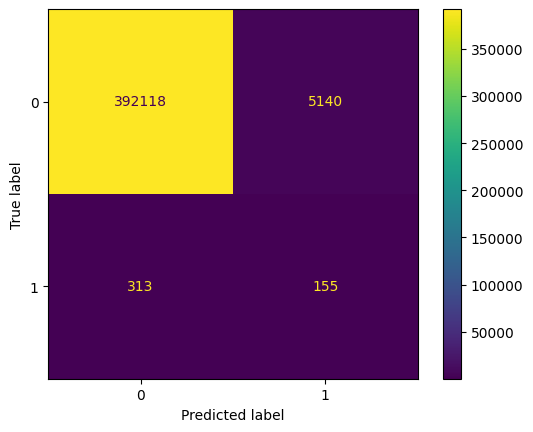

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_test = knn_model.predict(X_test_scaled)

precision_0 = precision_score(y_test, y_pred_test, pos_label=0)
recall_0 = recall_score(y_test, y_pred_test, pos_label=0)
f1_0 = f1_score(y_test, y_pred_test, pos_label=0)

precision_1 = precision_score(y_test, y_pred_test, pos_label=1)
recall_1 = recall_score(y_test, y_pred_test, pos_label=1)
f1_1 = f1_score(y_test, y_pred_test, pos_label=1)

# Print the results
print("Precision for label 0:", precision_0)
print("Recall for label 0:", recall_0)
print("F1-score for label 0:", f1_0)

print("Precision for label 1:", precision_1)
print("Recall for label 1:", recall_1)
print("F1-score for label 1:", f1_1)


cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

**آستانه**

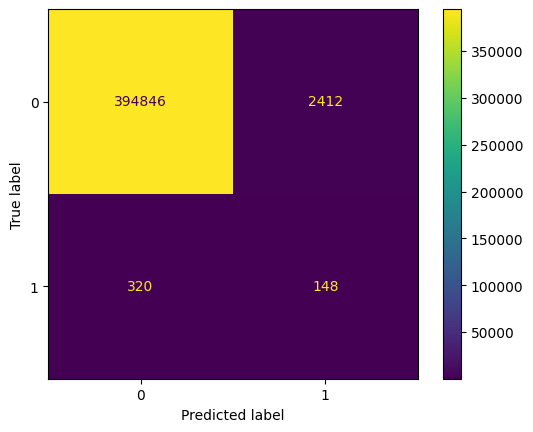

Optimal Threshold: 1.0
AUC-PR: 0.1758858748025228


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_prob = knn_model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

auc_pr = auc(recall, precision)

optimal_threshold = thresholds[np.argmax(2 * precision * recall / (precision + recall))]
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print("Optimal Threshold:", optimal_threshold)
print("AUC-PR:", auc_pr)


هایپر پارامتر

In [25]:
param_grid = {
    'n_neighbors': [2, 3, 4],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=3)  # You can adjust the number of folds (cv)

# Fit the model with the best hyperparameters using the training set
grid_search.fit(X_valid, y_valid)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model to make predictions on the test set
y_pred_test = grid_search.predict(X_test)

# Calculate accuracy for the test set
accuracy = accuracy_score(y_test, y_pred_test)

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Print classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# Print overall accuracy
print("\nOverall Accuracy:", accuracy)


Best Hyperparameters:
algorithm: auto
n_neighbors: 2

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    397258
           1       0.52      0.34      0.41       468

    accuracy                           1.00    397726
   macro avg       0.76      0.67      0.71    397726
weighted avg       1.00      1.00      1.00    397726


Overall Accuracy: 0.9988610249267084


**پیش بینی اشتباه**

In [24]:
misclassified_zero_indices = np.where((y_test == 1) & (y_pred == 0))[0]

for idx in misclassified_zero_indices:
    example_info = X_test.iloc[idx]
    predicted_label = y_pred[idx]
    true_label = y_test.iloc[idx]

    print(f"\nIndex: {idx}")
    print("Features:")
    print(example_info)
    print(f"Predicted Label: {predicted_label}, True Label: {true_label}")


Index: 9473
Features:
duration_hour                100.0
amount                     54994.1
balance_original_before    54994.1
type_CASH_IN                   0.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT                   1.0
type_TRANSFER                  0.0
Name: 1059510, dtype: float64
Predicted Label: 0, True Label: 1

Index: 15854
Features:
duration_hour                 135.00
amount                     128417.96
balance_original_before    128417.96
type_CASH_IN                    1.00
type_CASH_OUT                   0.00
type_DEBIT                      0.00
type_PAYMENT                    0.00
type_TRANSFER                   0.00
Name: 1291694, dtype: float64
Predicted Label: 0, True Label: 1

Index: 15896
Features:
duration_hour                100.0
amount                     28871.9
balance_original_before    28871.9
type_CASH_IN                   1.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT   

# **random forest**

**پیاده سازی**

Precision for label 0: 0.9990946104012957
Recall for label 0: 0.8944464302795664
F1-score for label 0: 0.9438787843369556
Precision for label 1: 0.0034697466609629737
Recall for label 1: 0.31196581196581197
F1-score for label 1: 0.00686315987401871


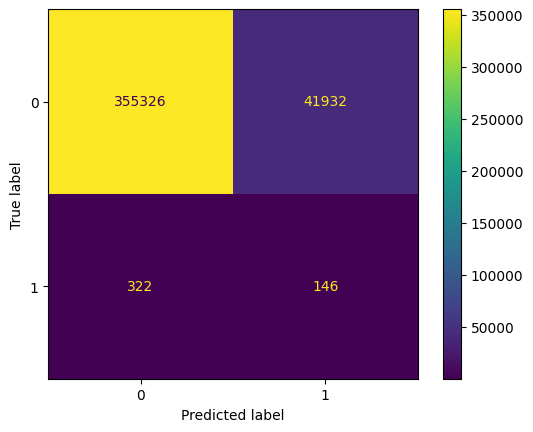

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# Initialize and train a simplified Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_test = rf_model.predict(X_test_scaled)

# Calculate precision, recall, and F1-score for labels 0 and 1 on the test set
precision_0 = precision_score(y_test, y_pred_test, pos_label=0)
recall_0 = recall_score(y_test, y_pred_test, pos_label=0)
f1_0 = f1_score(y_test, y_pred_test, pos_label=0)

precision_1 = precision_score(y_test, y_pred_test, pos_label=1)
recall_1 = recall_score(y_test, y_pred_test, pos_label=1)
f1_1 = f1_score(y_test, y_pred_test, pos_label=1)

# Print the results
print("Precision for label 0:", precision_0)
print("Recall for label 0:", recall_0)
print("F1-score for label 0:", f1_0)

print("Precision for label 1:", precision_1)
print("Recall for label 1:", recall_1)
print("F1-score for label 1:", f1_1)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


**آستانه**

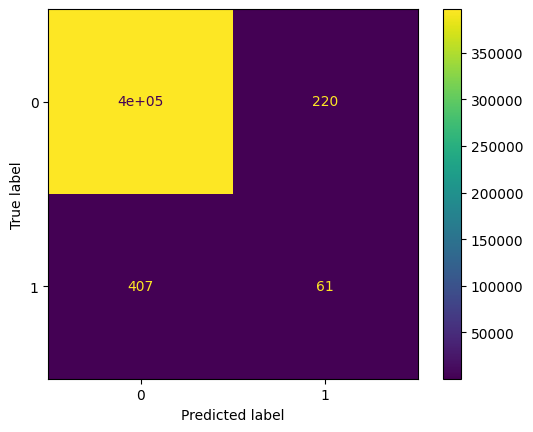

Optimal Threshold: 0.9345455478074156
AUC-PR: 0.038958313967351


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

auc_pr = auc(recall, precision)

optimal_threshold = thresholds[np.argmax(2 * precision * recall / (precision + recall))]

y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print("Optimal Threshold:", optimal_threshold)
print("AUC-PR:", auc_pr)


**هایپرپارامتر**

In [26]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 50, 100],
    'max_depth': [ 5, 10, 15]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=3)  # You can adjust the number of folds (cv)

# Fit the model with the best hyperparameters using the validation set
grid_search.fit(X_valid, y_valid)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
y_pred_test = grid_search.predict(X_test)

# Print classification report for the test set
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 10}

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    397258
           1       0.75      0.09      0.17       468

    accuracy                           1.00    397726
   macro avg       0.87      0.55      0.58    397726
weighted avg       1.00      1.00      1.00    397726



**پیش بینی اشتباه**

In [ ]:
misclassified_zero_indices = np.where((y_test == 1) & (y_pred == 0))[0]

for idx in misclassified_zero_indices:
    example_info = X_test.iloc[idx]
    predicted_label = y_pred[idx]
    true_label = y_test.iloc[idx]

    print(f"\nIndex: {idx}")
    print("Features:")
    print(example_info)
    print(f"Predicted Label: {predicted_label}, True Label: {true_label}")


Index: 9473
Features:
duration_hour                100.0
amount                     54994.1
balance_original_before    54994.1
type_CASH_IN                   0.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT                   1.0
type_TRANSFER                  0.0
Name: 1059510, dtype: float64
Predicted Label: 0, True Label: 1

Index: 15854
Features:
duration_hour                 135.00
amount                     128417.96
balance_original_before    128417.96
type_CASH_IN                    1.00
type_CASH_OUT                   0.00
type_DEBIT                      0.00
type_PAYMENT                    0.00
type_TRANSFER                   0.00
Name: 1291694, dtype: float64
Predicted Label: 0, True Label: 1

Index: 15896
Features:
duration_hour                100.0
amount                     28871.9
balance_original_before    28871.9
type_CASH_IN                   1.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT   

# **gradient boosting**

**پیاده سازی**

Precision for label 0: 0.9990762086726735
Recall for label 0: 0.9174491136742369
F1-score for label 0: 0.9565243635991438
Precision for label 1: 0.003978739559605164
Recall for label 1: 0.2799145299145299
F1-score for label 1: 0.007845955739226786


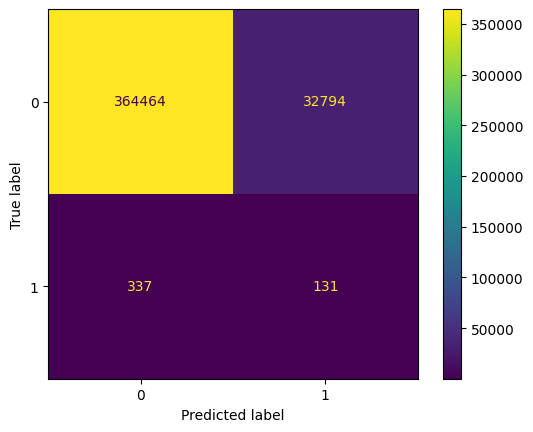

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

gb_model = GradientBoostingClassifier(n_estimators=10, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_test = gb_model.predict(X_test_scaled)

precision_0 = precision_score(y_test, y_pred_test, pos_label=0)
recall_0 = recall_score(y_test, y_pred_test, pos_label=0)
f1_0 = f1_score(y_test, y_pred_test, pos_label=0)

precision_1 = precision_score(y_test, y_pred_test, pos_label=1)
recall_1 = recall_score(y_test, y_pred_test, pos_label=1)
f1_1 = f1_score(y_test, y_pred_test, pos_label=1)

print("Precision for label 0:", precision_0)
print("Recall for label 0:", recall_0)
print("F1-score for label 0:", f1_0)

print("Precision for label 1:", precision_1)
print("Recall for label 1:", recall_1)
print("F1-score for label 1:", f1_1)

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


**آستانه**

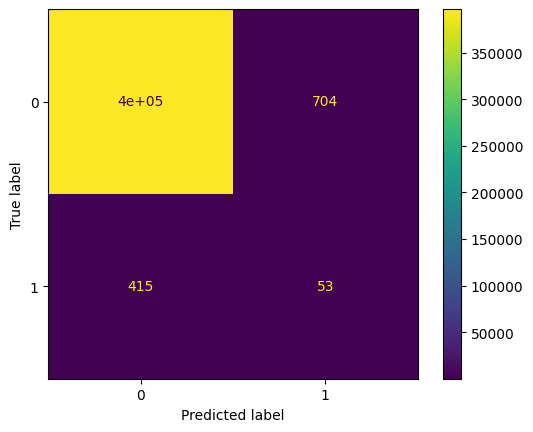

Optimal Threshold: 0.7951791420913141
AUC-PR: 0.06622984776996232


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

gb_model = GradientBoostingClassifier(n_estimators=10, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_prob = gb_model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

auc_pr = auc(recall, precision)

optimal_threshold = thresholds[np.argmax(2 * precision * recall / (precision + recall))]

y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print("Optimal Threshold:", optimal_threshold)
print("AUC-PR:", auc_pr)


**هایپر پارامتر**

In [27]:
param_grid = {
    'loss': ['deviance', 'exponential'],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(gb_model, param_grid, cv=3)

grid_search.fit(X_valid, y_valid)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy)

y_pred_test = grid_search.predict(X_test)

print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
 

Best Hyperparameters: {'learning_rate': 0.2, 'loss': 'deviance', 'n_estimators': 150}
Accuracy on Test Set: 0.9988962250393487
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    397258
           1       0.53      0.41      0.46       468

    accuracy                           1.00    397726
   macro avg       0.76      0.71      0.73    397726
weighted avg       1.00      1.00      1.00    397726



**پیش بینی اشتباه**

In [ ]:
misclassified_zero_indices = np.where((y_test == 1) & (y_pred == 0))[0]

for idx in misclassified_zero_indices:
    example_info = X_test.iloc[idx]
    predicted_label = y_pred[idx]
    true_label = y_test.iloc[idx]

    print(f"\nIndex: {idx}")
    print("Features:")
    print(example_info)
    print(f"Predicted Label: {predicted_label}, True Label: {true_label}")


Index: 9473
Features:
duration_hour                100.0
amount                     54994.1
balance_original_before    54994.1
type_CASH_IN                   0.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT                   1.0
type_TRANSFER                  0.0
Name: 1059510, dtype: float64
Predicted Label: 0, True Label: 1

Index: 15854
Features:
duration_hour                 135.00
amount                     128417.96
balance_original_before    128417.96
type_CASH_IN                    1.00
type_CASH_OUT                   0.00
type_DEBIT                      0.00
type_PAYMENT                    0.00
type_TRANSFER                   0.00
Name: 1291694, dtype: float64
Predicted Label: 0, True Label: 1

Index: 15896
Features:
duration_hour                100.0
amount                     28871.9
balance_original_before    28871.9
type_CASH_IN                   1.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT   

# **adaboost classifier**

**پیاده سازی**

Precision for label 0: 0.9990265523964484
Recall for label 0: 0.8964400968640027
F1-score for label 0: 0.9449572322988685
Precision for label 1: 0.002932551319648094
Recall for label 1: 0.25854700854700857
F1-score for label 1: 0.005799324210980374


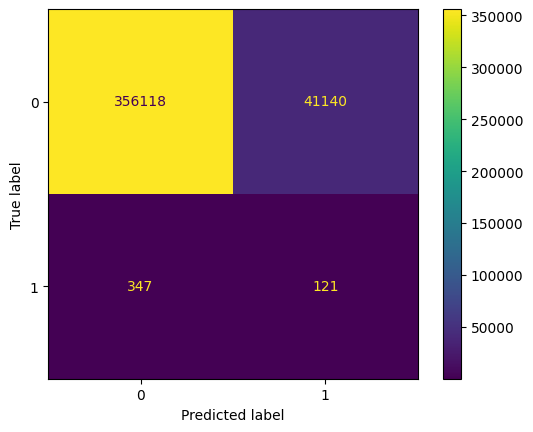

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

adaboost_model = AdaBoostClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
adaboost_model.fit(X_train_scaled, y_train)

y_pred_test = adaboost_model.predict(X_test_scaled)

precision_0 = precision_score(y_test, y_pred_test, pos_label=0)
recall_0 = recall_score(y_test, y_pred_test, pos_label=0)
f1_0 = f1_score(y_test, y_pred_test, pos_label=0)

precision_1 = precision_score(y_test, y_pred_test, pos_label=1)
recall_1 = recall_score(y_test, y_pred_test, pos_label=1)
f1_1 = f1_score(y_test, y_pred_test, pos_label=1)
print("Precision for label 0:", precision_0)
print("Recall for label 0:", recall_0)
print("F1-score for label 0:", f1_0)

print("Precision for label 1:", precision_1)
print("Recall for label 1:", recall_1)
print("F1-score for label 1:", f1_1)

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


**آستانه**

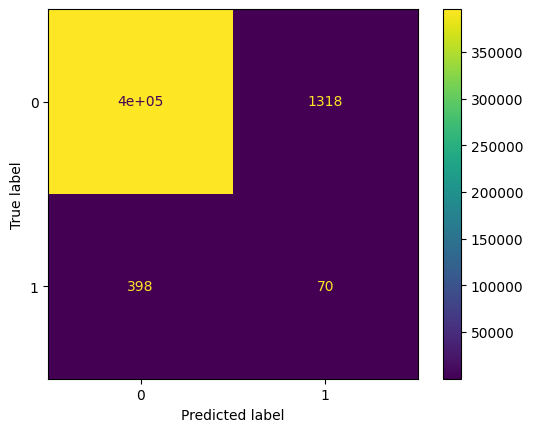

Optimal Threshold: 0.7429967774616161
AUC-PR: 0.022989334324723238


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

adaboost_model = AdaBoostClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
adaboost_model.fit(X_train_scaled, y_train)

y_prob = adaboost_model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

auc_pr = auc(recall, precision)

optimal_threshold = thresholds[np.argmax(2 * precision * recall / (precision + recall))]

y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_optimal)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print("Optimal Threshold:", optimal_threshold)
print("AUC-PR:", auc_pr)


**هایپرپارامتر**

In [28]:
param_grid = {
    'n_estimators': [5, 10],
    'learning_rate': [0.01, 0.1],
}

grid_search = GridSearchCV(adaboost_model, param_grid, cv=3)
grid_search.fit(X_valid, y_valid)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

y_pred_test = grid_search.predict(X_test)

print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_test))

overall_accuracy = accuracy_score(y_test, y_pred_test)
print("\nOverall Accuracy:", overall_accuracy)


Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 10}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.93      0.97    397258
           1       0.01      0.51      0.02       468

    accuracy                           0.93    397726
   macro avg       0.50      0.72      0.49    397726
weighted avg       1.00      0.93      0.96    397726


Overall Accuracy: 0.9325440127122693


**پیش بینی اشتباه**

In [ ]:
misclassified_zero_indices = np.where((y_test == 1) & (y_pred == 0))[0]

for idx in misclassified_zero_indices:
    example_info = X_test.iloc[idx]
    predicted_label = y_pred[idx]
    true_label = y_test.iloc[idx]

    print(f"\nIndex: {idx}")
    print("Features:")
    print(example_info)
    print(f"Predicted Label: {predicted_label}, True Label: {true_label}")


Index: 9473
Features:
duration_hour                100.0
amount                     54994.1
balance_original_before    54994.1
type_CASH_IN                   0.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT                   1.0
type_TRANSFER                  0.0
Name: 1059510, dtype: float64
Predicted Label: 0, True Label: 1

Index: 15854
Features:
duration_hour                 135.00
amount                     128417.96
balance_original_before    128417.96
type_CASH_IN                    1.00
type_CASH_OUT                   0.00
type_DEBIT                      0.00
type_PAYMENT                    0.00
type_TRANSFER                   0.00
Name: 1291694, dtype: float64
Predicted Label: 0, True Label: 1

Index: 15896
Features:
duration_hour                100.0
amount                     28871.9
balance_original_before    28871.9
type_CASH_IN                   1.0
type_CASH_OUT                  0.0
type_DEBIT                     0.0
type_PAYMENT   